<a href="https://colab.research.google.com/github/gopichand0416/Customer-segmentation/blob/main/Online_Retail_Customer_Segmentation_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Statement </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

In [ ]:
#import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/Online Retail.xlsx'
df=pd.read_excel(file_path)

In [ ]:
#looking random 3 rows
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
#shape of the dataset
df.shape

(541909, 8)

**From the above obtained output we can easily understand that there 541909 customer id's with 8 different columns.**

In [ ]:
#checking null values
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

The dataset has null column values of about 20%

In [ ]:
#copying the original dataset
df_copy=df.copy()

In [ ]:
#looking at the statistics
df_copy.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity and UnitPrice contains negative values, let look how many rows of them have -ve values

In [ ]:
df_copy[df_copy['Quantity']<0].shape

(10624, 8)

In [ ]:
df_copy[df_copy['UnitPrice']<0].shape

(2, 8)

In [ ]:
#consider only non-negative data.
df_copy=df_copy[df_copy['Quantity']>0]
df_copy=df_copy[df_copy['UnitPrice']>0]

In [ ]:
df_copy.shape

(530104, 8)

In [ ]:
df_copy.isna().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [ ]:
#removing null values
df_copy.dropna(inplace=True)

In [ ]:
df_copy.shape

(397884, 8)

In [ ]:
#Creating a new column 'Total_price'
df_copy['Total_Price']=df_copy['Quantity']*df_copy['UnitPrice']

In [ ]:
#looking at the datatypes
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
 8   Total_Price  397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


#EDA

Quantity column exploration

In [ ]:
quantity=df_copy['Quantity'].value_counts().reset_index()
quantity=quantity.rename(columns={'index':'Quantity','Quantity':'count'})

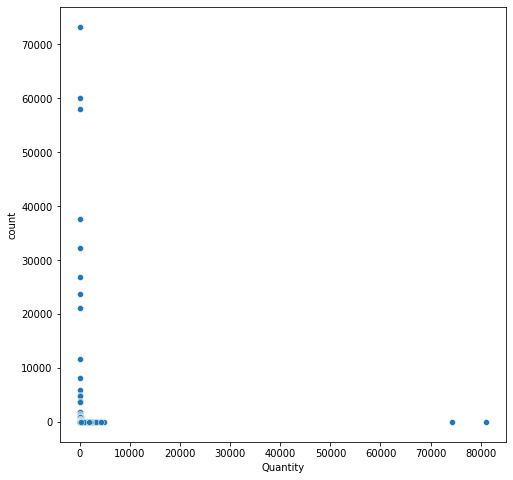

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='Quantity',y='count',data=quantity)

From the above obtained scatter plot we observe that there are more outliers above value 10000 so we need to eradicate them and make our data clean

In [ ]:
df_copy[df_copy['Quantity']>10000].shape

(2, 9)

In [ ]:
df_copy[df_copy['Quantity']>10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.6


Country column exploration

In [ ]:
country=df_copy['Country'].value_counts().reset_index()
country=country.rename(columns={'index':'country','Country':'Total invoices'})

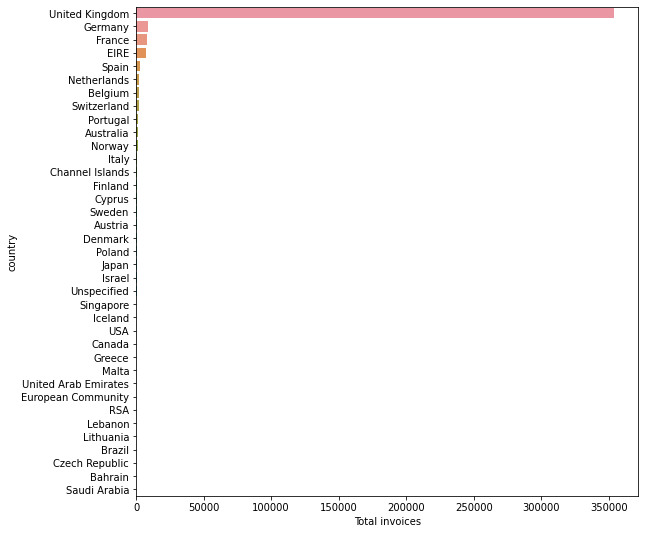

In [ ]:
plt.figure(figsize=(9,9))
sns.barplot(data=country,y='country',x='Total invoices')

In [ ]:
print(country)

                 country  Total invoices
0         United Kingdom          354321
1                Germany            9040
2                 France            8341
3                   EIRE            7236
4                  Spain            2484
5            Netherlands            2359
6                Belgium            2031
7            Switzerland            1841
8               Portugal            1462
9              Australia            1182
10                Norway            1071
11                 Italy             758
12       Channel Islands             748
13               Finland             685
14                Cyprus             614
15                Sweden             451
16               Austria             398
17               Denmark             380
18                Poland             330
19                 Japan             321
20                Israel             248
21           Unspecified             244
22             Singapore             222
23              

In [ ]:
#Analysing most bought products
products=df_copy['Description'].value_counts().reset_index()[:5]
products=products.rename(columns={'index':'product','Description':'Total sales'})

Text(0.5, 1.0, 'Top 5 products')

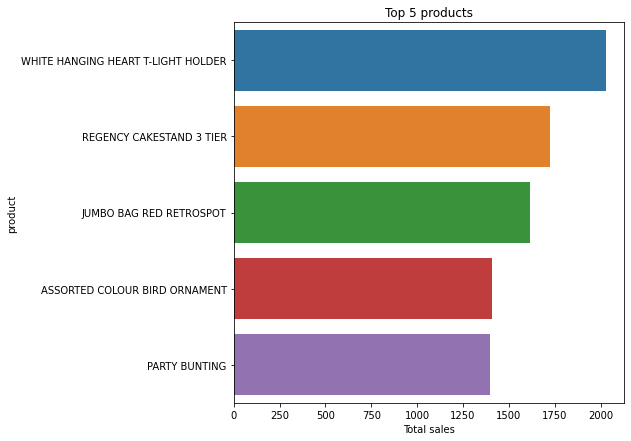

In [ ]:
plt.figure(figsize=(7,7))
sns.barplot(data=products,x='Total sales',y='product')
plt.title('Top 5 products')

In [ ]:
df_copy.head(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.3


In [ ]:
#convert InvoiceDate 
df_copy['InvoiceDate']=pd.to_datetime(df_copy['InvoiceDate'],format="%y-%m-%d %H:%M%:S")

In [ ]:
#extracting day name
df_copy['Day']=pd.DatetimeIndex(df_copy['InvoiceDate']).day_name()

In [ ]:
#extracting month name
df_copy['month']=pd.DatetimeIndex(df_copy['InvoiceDate']).month_name()

In [ ]:
#extracting year
df_copy['year']=pd.DatetimeIndex(df_copy['InvoiceDate']).year

In [ ]:
#extracting hour
df_copy['hour']=pd.DatetimeIndex(df_copy['InvoiceDate']).hour

In [ ]:
day_df=df_copy['Day'].value_counts().reset_index()
day_df.rename(columns={'index': 'Day_Name'}, inplace=True)
day_df.rename(columns={'Day': 'Count'}, inplace=True)

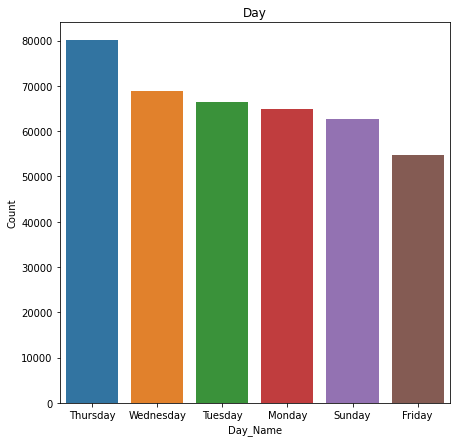

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Day')
sns.barplot(x='Day_Name',y='Count',data=day_df)

In [ ]:
month_df=df_copy['month'].value_counts().reset_index()
month_df.rename(columns={'index': 'Month_Name'}, inplace=True)
month_df.rename(columns={'month': 'Total sales'}, inplace=True)

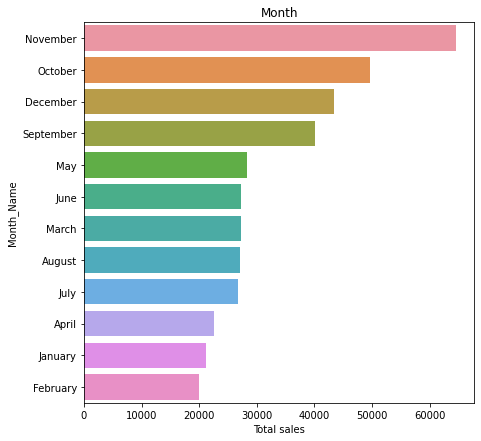

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Month')
sns.barplot(y='Month_Name',x='Total sales',data=month_df)

In [ ]:
hour_df=df_copy['hour'].value_counts().reset_index()
hour_df.rename(columns={'index': 'Hour_Name','hour': 'Count'}, inplace=True)

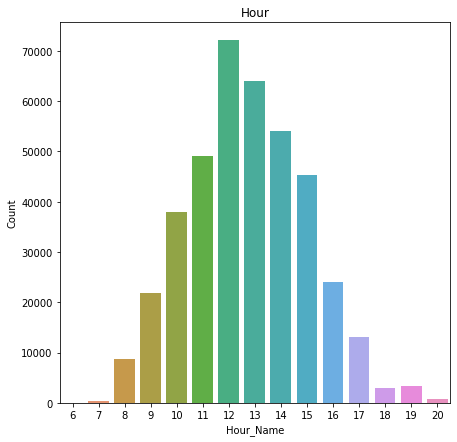

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Hour')
sns.barplot(x='Hour_Name',y='Count',data=hour_df)

UK tops the list, while Germany comes in second

#RFM(Recency,Frequency,Monetary) Analysis

Recency(Most recent purchase by customer.)-  Calculate the number of days between present date and date of last purchase each customer.

Frequency(How many times the customer purchased.)-  Calculate the number of orders for each customer.

Monetary(How much revenue generated through the customer.)-  Calculate sum of purchase price for each customer



In [ ]:
df_copy.tail(1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Day,month,year,hour
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France,14.85,Friday,December,2011,12


Here the last invoice date is on <b>2011-12-09</b>, this is required for calculating Recency

In [ ]:
import datetime as dt
Now=dt.date(2011,12,9)

In [ ]:
#creating a new column as 'date' 
df_copy['Date']=pd.DatetimeIndex(df_copy.InvoiceDate).date

In [ ]:
df_copy.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total_Price,Day,month,year,hour,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,Wednesday,December,2010,8,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,Wednesday,December,2010,8,2010-12-01


In [ ]:
# creating a recency dataframe
df_recency=df_copy.groupby(['CustomerID'],as_index=False)['Date'].max()
df_recency.head()


,CustomerID,Date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [ ]:
#Rename the column names of df_recency
df_recency.columns=['CustomerID','Last_Purchase_Date']

In [ ]:
#calculating Recency
df_recency['Recency']=df_recency.Last_Purchase_Date.apply(lambda x: (Now-x).days)

In [ ]:
df_recency.sample(5)

,CustomerID,Last_Purchase_Date,Recency
3253,16779.0,2011-12-07,2
4303,18236.0,2011-11-10,29
430,12897.0,2011-05-19,204
3033,16478.0,2011-11-14,25
324,12744.0,2011-10-19,51


In [ ]:
#calculating frequency and monetary
Frequency_monetary_df=df_copy.groupby(['CustomerID']).agg({'InvoiceNo':lambda x:len(x),#len function calculates number of invoice occurences based on rows
                                                 'Total_Price':lambda x:x.sum()}) #calculating monetary

In [ ]:
Frequency_monetary_df.head(2)

,InvoiceNo,Total_Price
CustomerID,,
12346.0,1,77183.6
12347.0,182,4310.0


In [ ]:
#renaming the column names
Frequency_monetary_df.rename(columns={'InvoiceNo':'Frequency','Total_Price':'Monetary_value'},inplace=True)

In [ ]:
Frequency_monetary_df.head(2)

,Frequency,Monetary_value
CustomerID,,
12346.0,1,77183.6
12347.0,182,4310.0


Merge Recency dataframe with Frequency Monetary dataframe

In [ ]:
rfm_df=df_recency.merge(Frequency_monetary_df,on='CustomerID')

In [ ]:
rfm_df.sample(2)

,CustomerID,Last_Purchase_Date,Recency,Frequency,Monetary_value
3695,17406.0,2011-01-10,333,113,2200.42
4226,18136.0,2011-10-07,63,38,784.33


In [ ]:
#dropping 'Last_purchased_date' column
rfm_df.drop(['Last_Purchase_Date'],axis=1,inplace=True)

In [ ]:
rfm_df.sample(2)

,CustomerID,Recency,Frequency,Monetary_value
141,12522.0,39,12,192.72
1643,14581.0,16,17,138.60


Now, we will be defining a rules for a metrics, where

1->best/very good customer

2->good

3->neither good nor bad

4->likely leaving customer

In [ ]:
#applying quantiles to split the data into 4 metrics
quantiles=rfm_df.quantile(q=[0.25,0.50,0.75])


In [ ]:
quantiles

,CustomerID,Recency,Frequency,Monetary_value
0.25,13813.25,17.00,17.0,307.415
0.50,15299.50,50.00,41.0,674.485
0.75,16778.75,141.75,100.0,1661.740


In [ ]:
#making quantiles as a dictionary
quantiles=quantiles.to_dict()

In [ ]:
quantiles

{'CustomerID': {0.25: 13813.25, 0.5: 15299.5, 0.75: 16778.75},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 100.0},
 'Monetary_value': {0.25: 307.41499999999996,
  0.5: 674.4849999999999,
  0.75: 1661.7400000000002},
 'Recency': {0.25: 17.0, 0.5: 50.0, 0.75: 141.75}}

In [ ]:
#taking a copy of rfm_df
rfm_copy=rfm_df.copy()

In [ ]:
# Calculating recency score
def RecencyScore(rfm_value,type,quantiles):
  ''' This function is used to return Recency score where 1 is best and 4 is worst score'''
  if rfm_value<=quantiles[type][0.25]:
    return 1
  elif rfm_value<=quantiles[type][0.50]:
    return 2
  elif rfm_value<=quantiles[type][0.75]:
    return 3
  else:
    return 4

In [ ]:
#calculating Frequency and Monetary values.
def Frequency_monetary_score(rfm_value,type,quantiles):
  '''This function is used to return Frequency and Monetary values where 4 is best and 1 is worst'''
  if rfm_value<=quantiles[type][0.25]:
    return 4
  elif rfm_value<=quantiles[type][0.50]:
    return 3
  elif rfm_value<=quantiles[type][0.75]:
    return 2
  else:
    return 1

In [ ]:
#Passing under Recency score function
rfm_copy['Recency_quantile']=rfm_copy.Recency.apply(RecencyScore,args=('Recency',quantiles))

In [ ]:
#passing for Frequency
rfm_copy['Frequency_quantile']=rfm_copy.Frequency.apply(Frequency_monetary_score,args=('Frequency',quantiles))

In [ ]:
#passing for Monetary
rfm_copy['Monetary_quantile']=rfm_copy.Monetary_value.apply(Frequency_monetary_score,args=('Monetary_value',quantiles))

In [ ]:
rfm_copy.head()

,CustomerID,Recency,Frequency,Monetary_value,Recency_quantile,Frequency_quantile,Monetary_quantile
0,12346.0,325,1,77183.60,4,4,1
1,12347.0,2,182,4310.00,1,1,1
2,12348.0,75,31,1797.24,3,3,1
3,12349.0,18,73,1757.55,2,2,1
4,12350.0,310,17,334.40,4,4,3


In [ ]:
#now combining the RFM quantile score as a single data column
rfm_copy['RFM_quantile']=rfm_copy['Recency_quantile'].map(str)+rfm_copy['Frequency_quantile'].map(str)+rfm_copy['Monetary_quantile'].map(str)

In [ ]:
rfm_copy.head(2)

,CustomerID,Recency,Frequency,Monetary_value,Recency_quantile,Frequency_quantile,Monetary_quantile,RFM_quantile
0,12346.0,325,1,77183.6,4,4,1,441
1,12347.0,2,182,4310.0,1,1,1,111


In [ ]:

# printing best to worst customer segmentation
print(f"Best Customers: {len(rfm_copy[rfm_copy['RFM_quantile']=='111'])}")
print(f"Loyal customers: {len(rfm_copy[rfm_copy['Frequency_quantile']==1])}")
print(f"Aggressive Spenders: {len(rfm_copy[rfm_copy['Monetary_quantile']==1])}")
print(f"Almost Lost customers: {len(rfm_copy[rfm_copy['RFM_quantile']=='333'])}")
print(f"Lost customers: {len(rfm_copy[rfm_copy['RFM_quantile']=='444'])}")

Best Customers: 440
Loyal customers: 1080
Aggressive Spenders: 1085
Almost Lost customers: 165
Lost customers: 385


# Suggested Marget Strategies for the customer metrics

Best customers: Introduce new products to them and create a strong bond

Aggressive Spenders: introduce costly products to them

Almost Lost customers: introduce discounts or price incentives to them

Lost customers: don't spend much about them

# Applying Clusters

Checking the distribution of the dataset

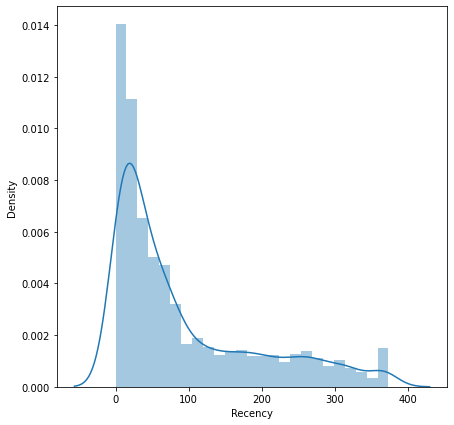

In [ ]:
#recency distribution
plt.figure(figsize=(7,7))
sns.distplot(rfm_copy['Recency'])

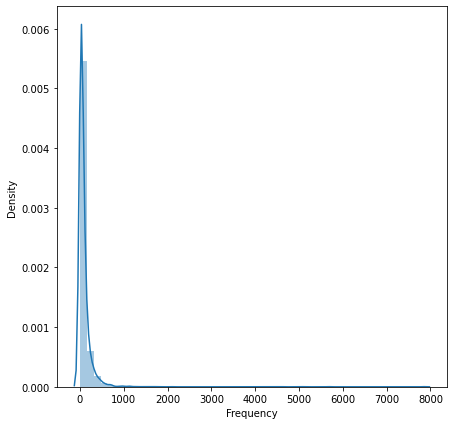

In [ ]:
#frequency distribution
plt.figure(figsize=(7,7))
sns.distplot(rfm_copy['Frequency'])

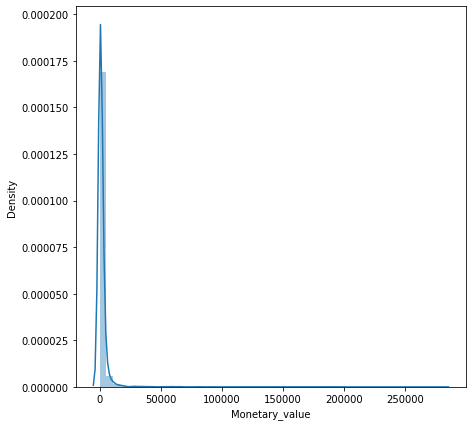

In [ ]:
#frequency distribution
plt.figure(figsize=(7,7))
sns.distplot(rfm_copy['Monetary_value'])

All the above three important metrics are in Right skewed, applying logarithmic to make it as Symmetric

In [ ]:
rfm_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4338 entries, 0 to 4337
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          4338 non-null   float64
 1   Recency             4338 non-null   int64  
 2   Frequency           4338 non-null   int64  
 3   Monetary_value      4338 non-null   float64
 4   Recency_quantile    4338 non-null   int64  
 5   Frequency_quantile  4338 non-null   int64  
 6   Monetary_quantile   4338 non-null   int64  
 7   RFM_quantile        4338 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 305.0+ KB


In [ ]:
#function to convert int datatype as float results in infinity which throws error during log transformation
def convert_to_int(x):
  if x in[float("-inf") or float("inf")]:
     return 1
  return int(round(x))

In [ ]:
#function to convert negative values to zero
def convert_non_zero(x):
  if x<=0:
    return 1
  else:
    return x

In [ ]:
rfm_copy['Recency']=rfm_copy['Recency'].apply(lambda x:convert_to_int(x))
rfm_copy['Recency']=rfm_copy['Recency'].apply(lambda x:convert_non_zero(x))

In [ ]:
rfm_copy['Frequency']=rfm_copy['Frequency'].apply(lambda x:convert_to_int(x))
rfm_copy['Frequency']=rfm_copy['Frequency'].apply(lambda x:convert_non_zero(x))
rfm_copy['Monetary_value']=rfm_copy['Monetary_value'].apply(lambda x:convert_to_int(x))
rfm_copy['Monetary_value']=rfm_copy['Monetary_value'].apply(lambda x:convert_non_zero(x))

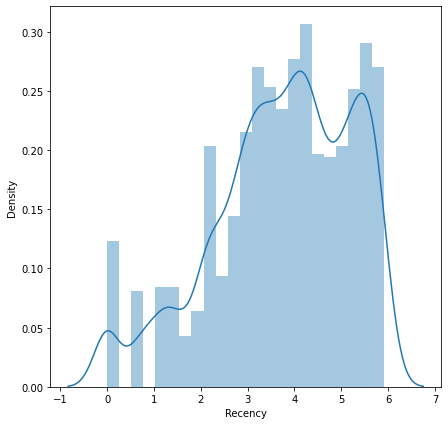

In [ ]:
#recency distribution after log
plt.figure(figsize=(7,7))
sns.distplot(np.log(rfm_copy['Recency']))

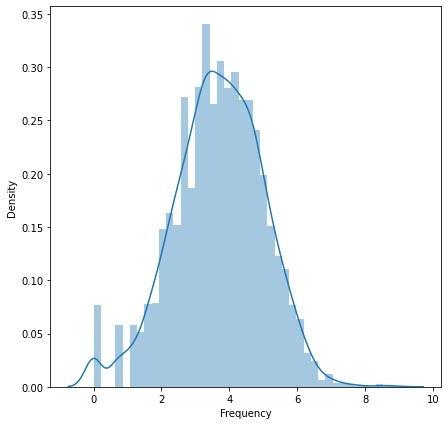

In [ ]:
#frequency distribution after log
plt.figure(figsize=(7,7))
sns.distplot(np.log(rfm_copy['Frequency']))

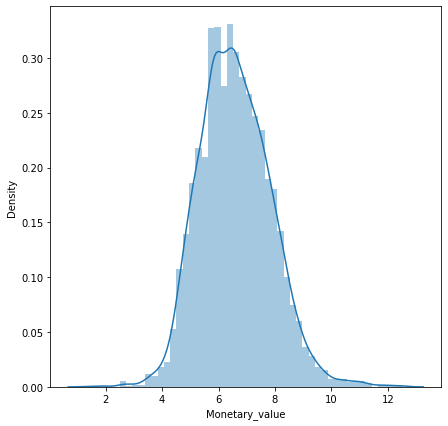

In [ ]:
#monetary_value distribution after log
plt.figure(figsize=(7,7))
sns.distplot(np.log(rfm_copy['Monetary_value']))

In [ ]:
rfm_copy.describe()

,CustomerID,Recency,Frequency,Monetary_value,Recency_quantile,Frequency_quantile,Monetary_quantile
count,4338.000000,4338.000000,4338.000000,4338.000000,4338.000000,4338.00000,4338.000000
mean,15300.408022,92.067543,91.720609,2054.267635,2.494237,2.50876,2.500000
std,1721.808492,100.004876,228.785094,8989.230661,1.122059,1.12204,1.118369
min,12346.000000,1.000000,1.000000,4.000000,1.000000,1.00000,1.000000
25%,13813.250000,17.000000,17.000000,307.000000,1.000000,2.00000,1.250000
50%,15299.500000,50.000000,41.000000,674.500000,2.000000,3.00000,2.500000
75%,16778.750000,141.750000,100.000000,1661.750000,3.750000,4.00000,3.750000
max,18287.000000,373.000000,7847.000000,280206.000000,4.000000,4.00000,4.000000


In [ ]:
# Log transformation for making the data looks like a normally distributed
rfm_log=rfm_copy[['Recency','Frequency','Monetary_value']].apply(np.log,axis=1).round(2)

In [ ]:
rfm_log.describe()

,Recency,Frequency,Monetary_value
count,4338.000000,4338.000000,4338.000000
mean,3.736992,3.679631,6.590858
std,1.474452,1.326082,1.260916
min,0.000000,0.000000,1.390000
25%,2.830000,2.830000,5.730000
50%,3.910000,3.710000,6.510000
75%,4.957500,4.610000,7.420000
max,5.920000,8.970000,12.540000


#Applying K-means clustering

Finding the optimal no of clusters, applying Elbow method

In [ ]:
#importing Preprocessing
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [ ]:
#applying fit_transform
rfm_scaled=scaler.fit_transform(rfm_log)

In [ ]:
#wcss method for finding number of clusters required to apply.
wcss=[]
for k in range(1,10):
  kmeans=KMeans(n_clusters=k,init='k-means++')
  kmeans=kmeans.fit(rfm_scaled)
  wcss.append(kmeans.inertia_)

In [ ]:
#looking at wcss values
wcss

[13014.000000000007,
 6890.2192389659085,
 5307.313767603759,
 4458.623808717849,
 3775.0814909589553,
 3373.9079007010578,
 3056.584617593902,
 2803.3772675850546,
 2624.330152533734]

Text(0, 0.5, 'Within Cluster Sum of scores')

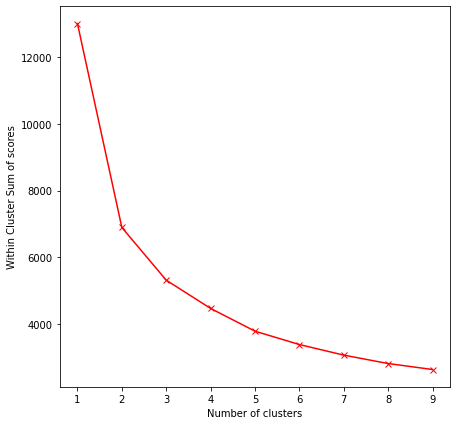

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(range(1,10),wcss,'rx-') #plot in red color
plt.xlabel('Number of clusters')
plt.ylabel('Within Cluster Sum of scores')

By the above plot, we can conclude that optimal number of clusters required is 4

Applying Silhoutte Score to find number of clusters required


In [ ]:
#importing silhoutte library
from sklearn.metrics import silhouette_score

In [ ]:
for k in range(2,10): #should start from 2 when using 'Silhoutte score' because silhoutte score is not defined when all points in one cluster(same cluster)
  silhoutte_cluster=KMeans(n_clusters=k)
  predict=silhoutte_cluster.fit_predict(rfm_scaled)
  centers=silhoutte_cluster.cluster_centers_
  score=silhouette_score(rfm_scaled,predict)
  print("For n_clusters = {}, silhouette score is {}".format(k, score))

For n_clusters = 2, silhouette score is 0.39541437028534315
For n_clusters = 3, silhouette score is 0.30523893764876947
For n_clusters = 4, silhouette score is 0.30294884406517614
For n_clusters = 5, silhouette score is 0.27852418947189234
For n_clusters = 6, silhouette score is 0.2790057233757065
For n_clusters = 7, silhouette score is 0.26183168861437844
For n_clusters = 8, silhouette score is 0.26442616854612144
For n_clusters = 9, silhouette score is 0.2599003913344427


From silhoutte score, it is clear that optimal number of clusters required is 2

#Applying KMeans with 4 clusters

In [ ]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(rfm_scaled)
predict=kmeans.predict(rfm_scaled)

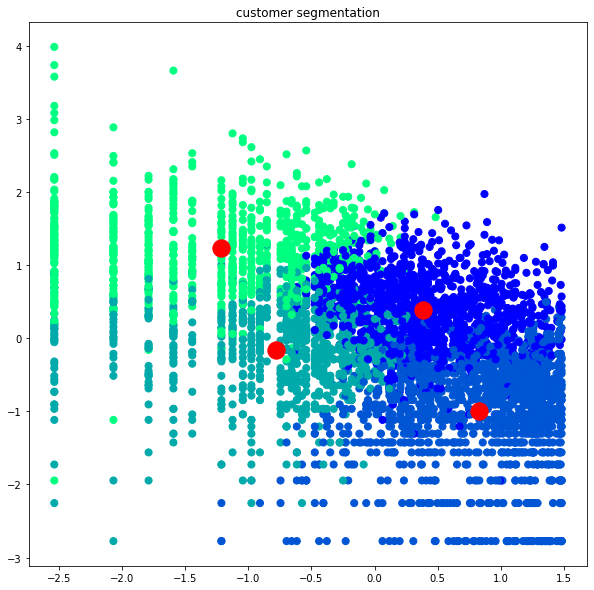

In [ ]:


plt.figure(figsize=(10,10))
plt.title('customer segmentation')
plt.scatter(rfm_scaled[:, 0], rfm_scaled[:, 1], c=predict, s=50, cmap='winter')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red',s=300,alpha=1)

## Summary:-
 We would summarize the project with following points:  
 1.From the given data we can observe that there are more number of null's present in data which means there are almost 25% fraud purchases happened from the data.  
 2.Based on country we can observe that there are more number of customers from Uk it gives us clear idea that data is more concentrated on uk.   
 3.Suggested Market Strategies for the customer metrics  
Best customers: Introduce new products to them and create a strong bond

Aggressive Spenders: introduce costly products to them

Almost Lost customers: introduce discounts or price incentives to them

Lost customers: don't spend much about them.    
4.From clustering we can observe that we can concentrate on four different types of customers which would give benefit for the companies but concentarting on the other types of customers it will be waste of money and time for companies.